# **EAs with crossover only**
Experiment to try running an evolutionary algorithm with only crossover to see how the population adapts.

NOTE: leap_ec version 0.7.0dev

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

from toolz import pipe

from leap_ec.problem import ConstantProblem
from leap_ec.individual import Individual
from leap_ec.decoder import IdentityDecoder
from leap_ec.context import context
from leap_ec.probe import CartesianPhenotypePlotProbe
import leap_ec.ops as ops
from leap_ec.real_rep.initializers import create_real_vector
from leap_ec import util

## **Problem & Representation**
The exercise is to look at the effects of just crossover -- i.e., how crossover explores a search space.  For this, we generate individuals along a diagonal. And then we randomly select parents and cross them over.  That's all.

In [14]:
# Hand craft individuals so that they're a perfect line.
parents = []
for coord in range(100):
    parents.append(Individual(genome=[coord,coord]))
        
# Note that we didn't bother with hooking up a problem since we're just going to do crossover and won't evaluate
# the individuals for this exercise.

<IPython.core.display.Javascript object>


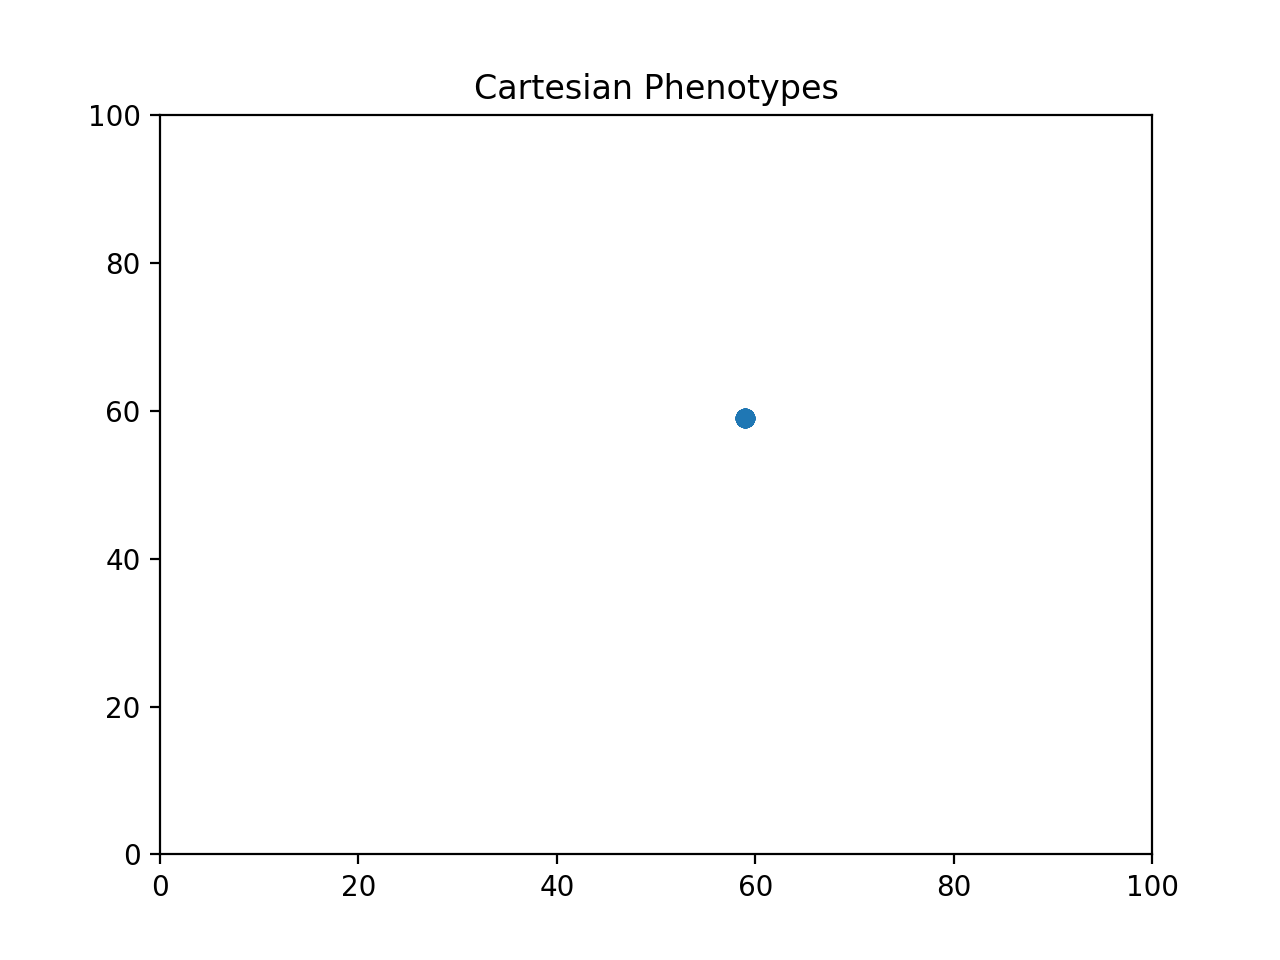

In [16]:
first_probe = CartesianPhenotypePlotProbe(xlim=(0, 100), ylim=(0, 100), granularity=0.025, context=context)

In [17]:
generation_counter = util.inc_generation(context=context)

while generation_counter.generation() < 100:
    offspring = pipe(parents,
                     ops.random_selection,
                     ops.clone,
                     ops.uniform_crossover(p_swap=0.2), # 100% chance of doing crossover.
                     ops.pool(size=len(parents)),
                     first_probe
                    )
    parents = offspring
    generation_counter()    

Now with the smaller bounds

In [18]:
parents = []
for coord in range(40,60):
    parents.append(Individual(genome=[coord,coord]))

In [19]:
generation_counter = util.inc_generation(context=context)

while generation_counter.generation() < 100:
    offspring = pipe(parents,
                     ops.random_selection,
                     ops.clone,
                     ops.uniform_crossover(p_swap=0.2),
                     ops.pool(size=len(parents)),
                     first_probe
                    )
    parents = offspring
    generation_counter()  

Notice that individuals appear to disappear over the course of each run.  Why is that?  :D